This notebook introduces the use of dictionaries for counting the frequency of some category of words in text, using sentiment (from the [AFINN sentiment lexicon](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010)) in the time series data of tweets as an example.

This notebook uses data from the AFINN sentiment lexicon; for other dictionaries in wide use, see [MPQA](https://mpqa.cs.pitt.edu/lexicons/subj_lexicon/) (free for use with registration) and [LIWC](http://liwc.wpengine.com) (commercial).

Before running this notebook, install pandas:

```sh
source activate anlp
conda install pandas=0.24.0
conda install matplotlib=3.0.2
```

In [1]:
import json
import nltk
import pandas as pd
import matplotlib

In [2]:
# read in json file of tweets and return a list of (date, tokenized text)
def read_tweets_from_json(filename):
    
    tweets=[]
    with open(filename, encoding="utf-8") as file:
        data=json.load(file)
        for tweet in data:
            created_at=tweet["created_at"]
            date = pd.to_datetime(created_at)
            text=tweet["text"]
            tokens=nltk.casual_tokenize(text)
            tweets.append((date, tokens)) # does this make tweets a list of tuples?
    return tweets

In [3]:
# read in list of (date, tokens) tweets and count whether each tweet contains 
# a (lowercased) term in the argument dictionary.  Return as pandas dataframe
# for easier slicing/plotting)
def dictionary_document_count(data, dictionary):
    counted=[]
    for date, tokens in data:
        val=0
        for word in tokens: # counts dictionary words in a specific tweet
            if word.lower() in dictionary:
                val=1
        counted.append((date, val)) # is also counted now a list of tuples, (date of tweet, number of word occurences)
    df=pd.DataFrame(counted, columns=['date','document frequency'])
    return df

In [4]:
tweets=read_tweets_from_json("../data/trump_tweets.json")

Here we'll define our own "immigration" dictionary by selecting words that we hypothesize are often found in the topic of immigration.

In [5]:
immigration_dictionary=set(["wall", "border", "borders", "immigrants","immigration"])

In [6]:
counts=dictionary_document_count(tweets, immigration_dictionary)

In [7]:
def plot_time(counts):
    
    # for this exercise, let's just keep tweets published after 2015
    counts=counts[(counts['date'] > '2015-01-01')]
    
    # counts is a pandas dataframe; let's aggregate the counts by month.  
    # Can also aggregate by "D" for day, "W" for week, "Y" for year.
    means=counts.resample('M', on='date').mean() 
    
    means.plot()

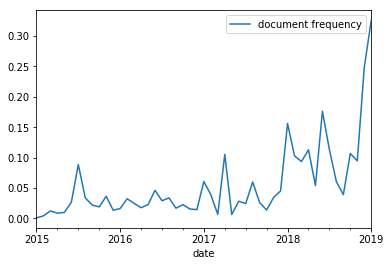

In [9]:
# You might need to run this command twice if you get a warning
plot_time(counts)

Q1: The AFINN dictionary is a sentiment lexicon, where words are rated on a five-point affect scale (-5 = most negative, 5 = most positive).  Write a function `read_AFINN_dictionary` to read in this file and create two dictionaries like that above -- one for positive terms and one for negative terms.  How did you decide the cutoff point for positive and negative?

In [10]:
def read_AFINN_dictionary(filename):
    positive=[]
    negative=[]
    
    with open(filename, encoding="utf-8") as file:
        lines = file.readlines()
        for line in lines:
            word, rating = line.split('\t')
            if int(rating) > 0:
                positive.append(word)
            else:
                negative.append(word)    
    return set(positive), set(negative)

In [11]:
positive, negative=read_AFINN_dictionary("../data/AFINN-111.txt")

Q2: Create a plot (like that above) using the negative sentiment dictionary you created

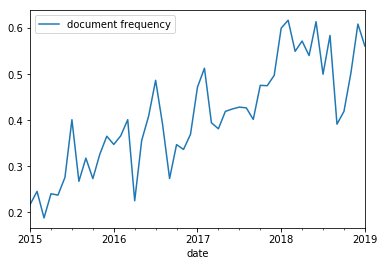

In [12]:
counts=dictionary_document_count(tweets, negative)
plot_time(counts)

Q3: Create a new dictionary of your own for a concept you'd like to measure in `trump_tweets.json` or `aoc_tweets.json`.  The dictionary must contain at least 10 terms; you're free to create one for any category (except sentiment!), so be creative--we'll be comparing these in class on Thursday. Create a plot using that dictionary and data below.

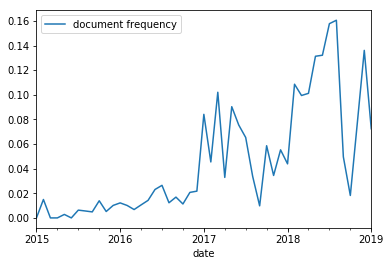

In [13]:
climate_dictionary=set(["climate", "environment", "degree", "degrees", "coal", "environmental", "green", "global", "warming", "solar", "recycling", "renewable", "sustainable", "sustainability", "summit", "planet", "davos", "greenhouse", "paris", "agreement"])
space_dictionary=set(["space", "mars", "spacex", "astronaut", "solar", "moon", "rocket", "landing", "nasa", "iss", "esa", "planet", "star", "galaxy", "seti", "comet", "asteroid", "meteor", "meteorite", "meteoroid", "earth", "universe", "colonize", "colony"])
impeachment_dictionary=set(["impeachment", "impeach", "mueller", "robert", "investigation", "report", "investigate", "involvement", "witch", "hunt", "guilty", "guilt", "innocent", "innocence", "indictment", "russia", "counsel", "interference"])

counts=dictionary_document_count(tweets, impeachment_dictionary)
plot_time(counts)

Q4 (check-plus): for each of the terms in your dictionary, write a function `print_examples(tweets, dictionary)` to find one tweet that contains that term and print it out for your inspection.  Is that term used in the same sense you expected?

In [15]:
from numpy import random

def print_examples(tweets, dictionary):
    random.seed(42)
    bound = 0.95
    
    for date, tweet in tweets:
        for word in tweet:
            if word.lower() in dictionary:
                if random.randn() > bound:
                    print("Example of", word.lower(), ":", tweet, "\n")
                    dictionary.remove(word.lower())
                    
# Alternative approach, not exactly working
from collections import defaultdict

def print_examples2(tweets, dictionary):
    random.seed(42)
    entry_library = defaultdict(set)
    for entry in dictionary:
        entry_library[entry] = set()
    
    for date, tweet in tweets:
        for word in tweet:
            if word.lower() in dictionary:
                entry_library[word.lower()].add(tuple(tweet))
    
    for entry, library in entry_library.items():
        tweet = random.choice(library)
        print("Example of", entry, ":", tweet, "\n")

In [16]:
print_examples(tweets, impeachment_dictionary)

Example of witch : ['Gregg', 'Jarrett', ':', '“', 'Mueller', '’', 's', 'prosecutors', 'knew', 'the', '“', 'Dossier', '”', 'was', 'the', 'product', 'of', 'bias', 'and', 'deception', '.', '”', 'It', 'was', 'a', 'Fake', ',', 'just', 'like', 'so', 'much', 'news', 'coverage', 'in', 'our', 'Country', '.', 'Nothing', 'but', 'a', 'Witch', 'Hunt', ',', 'from', 'beginning', 'to', 'end', '!'] 

Example of investigation : ['The', 'rank', 'and', 'file', 'of', 'the', 'FBI', 'are', 'great', 'people', 'who', 'are', 'disgusted', 'with', 'what', 'they', 'are', 'learning', 'about', 'Lyin', '’', 'James', 'Comey', 'and', 'the', 'so-called', '“', 'leaders', '”', 'of', 'the', 'FBI', '.', 'Twelve', 'have', 'been', 'fired', 'or', 'forced', 'to', 'leave', '.', 'They', 'got', 'caught', 'spying', 'on', 'my', 'campaign', 'and', 'then', 'called', 'it', 'an', 'investigation', '.', 'Bad', '!'] 

Example of mueller : ['The', 'Mueller', 'Angry', 'Democrats', 'recently', 'deleted', 'approximately', '19,000', 'Text', 'me